# Gemstones - Predicting Price

![Gemstone](gemstone.png)

# Table of Contents

* [1. Introduction](#introduction)
* [2. Loading the Data](#loading-data)
* [3. Exploratory Data Analysis (EDA)](#eda)
* [4. Feature Engineering & Data Wrangling](#fe-dw)
* [5. Model Training](#model-training)
* [ Result](#result)

#  1. Introduction <a class="anchor" id="introduction"></a>
Gemstones have captivated humanity for centuries with their exquisite beauty, rarity, and enduring allure. From the brilliant sparkle of diamonds to the mesmerizing hues of sapphires and emeralds, these precious stones hold a special place in our hearts and culture. However, determining the true value of a gemstone has always been a complex and intricate task, relying on a myriad of factors such as cut, clarity, carat weight, and color. To tackle this challenge and unlock new insights into pricing, the world of gemology has turned to the cutting-edge field of machine learning.

In this exploration of predicting gemstone prices using machine learning, we delve into the fascinating world of gemology, where the artistry of nature converges with the analytical power of technology. We will uncover the key factors that influence gemstone value, including the famous four Cs—cut, clarity, carat weight, and color—and examine how machine learning algorithms can learn from these factors to develop robust pricing models.

Join us on this captivating journey as we combine the timeless beauty of gemstones with the cutting-edge power of machine learning. Together, we will unravel the mysteries of gemstone valuation, unlocking new horizons in the fascinating world of precious gemstones.

`Note`: Remember that we are working with `cubic zirconia`. We are provided with the dataset containing the prices and other attributes of almost 193,600 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. We have to help the company in predicting the price for the stone on the basis of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have a better profit share `jewels`

# 2. Loading the Data <a class="anchor" id="loading-data"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv', index_col = 'id')

In [3]:
train_df

carat        cut color clarity  depth  table     x     y     z  price
id                                                                           
0        1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1        2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2        0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3        0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4        1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453
...       ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39  2.67   1130
193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77  3.47   2874
193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75  3.62   3036
193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49  2.81    681
193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71  3.48   2258

[193573 rows x 10 columns]

## Feature Classification: Categorical and Numerical

### Categorical
- `nominal`, `ordinal`, `ratio`, `interval`

### Numerical
- `discrete`, `continuous`, `timeseries`

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 16.2+ MB


- Categorical: `cut`, `color` (Label), `clarity`
- Numerical: `depth`, `table`, `x`, `y`, `z`, `carat` (Continuous), `Price` 
- Mix types of data: `clarity`
- Contain Error/Typo: None
- Null values: None
- Various Data Types: String, Int, Float

In [4]:
train_df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [3]:
train_df.duplicated().sum()

0

In [8]:
train_df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [9]:
train_df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

## Attribute comprehension
- Carat: It is the weight of the cubic zirconia.
- Cut: It describes the cut quality of the cubic zirconia. Quality is in increasing order Fair, Good, Very Good, Premium, Ideal.(Ordinal data)
- Color: It is the colour of the cubic zirconia. D being the best and J the worst.
- Clarity: It refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
- Depth: It describes the height of the cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
- Table: It describes the width of the cubic zirconia’s Table expressed as a Percentage of its Average Diameter.
- Price: It describes the Price of the cubic zirconia.
- X: It describes the length of the cubic zirconia in mm.
- Y: It describes the width of the cubic zirconia in mm.
- Z: It describes the height of the cubic zirconia in mm.

In [38]:
train_df.describe()

carat          depth          table              x  \
count  193573.000000  193573.000000  193573.000000  193573.000000   
mean        0.790688      61.820574      57.227675       5.715312   
std         0.462688       1.081704       1.918844       1.109422   
min         0.200000      52.100000      49.000000       0.000000   
25%         0.400000      61.300000      56.000000       4.700000   
50%         0.700000      61.900000      57.000000       5.700000   
75%         1.030000      62.400000      58.000000       6.510000   
max         3.500000      71.600000      79.000000       9.650000   

                   y              z          price  
count  193573.000000  193573.000000  193573.000000  
mean        5.720094       3.534246    3969.155414  
std         1.102333       0.688922    4034.374138  
min         0.000000       0.000000     326.000000  
25%         4.710000       2.900000     951.000000  
50%         5.720000       3.530000    2401.000000  
75%         6.510000       4.030000    5408.000000  
max        10.010000      31.300000   18818.000000

In [113]:
cat_features = ['cut', 'color', 'clarity']
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(train_df, cat_features)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   carat    193573 non-null  float64 
 1   cut      193573 non-null  category
 2   color    193573 non-null  category
 3   clarity  193573 non-null  category
 4   depth    193573 non-null  float64 
 5   table    193573 non-null  float64 
 6   x        193573 non-null  float64 
 7   y        193573 non-null  float64 
 8   z        193573 non-null  float64 
 9   price    193573 non-null  int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 12.4 MB


In [6]:
train_df.describe(include = ['category'])

cut   color clarity
count   193573  193573  193573
unique       5       7       8
top      Ideal       G     SI1
freq     92454   44391   53272

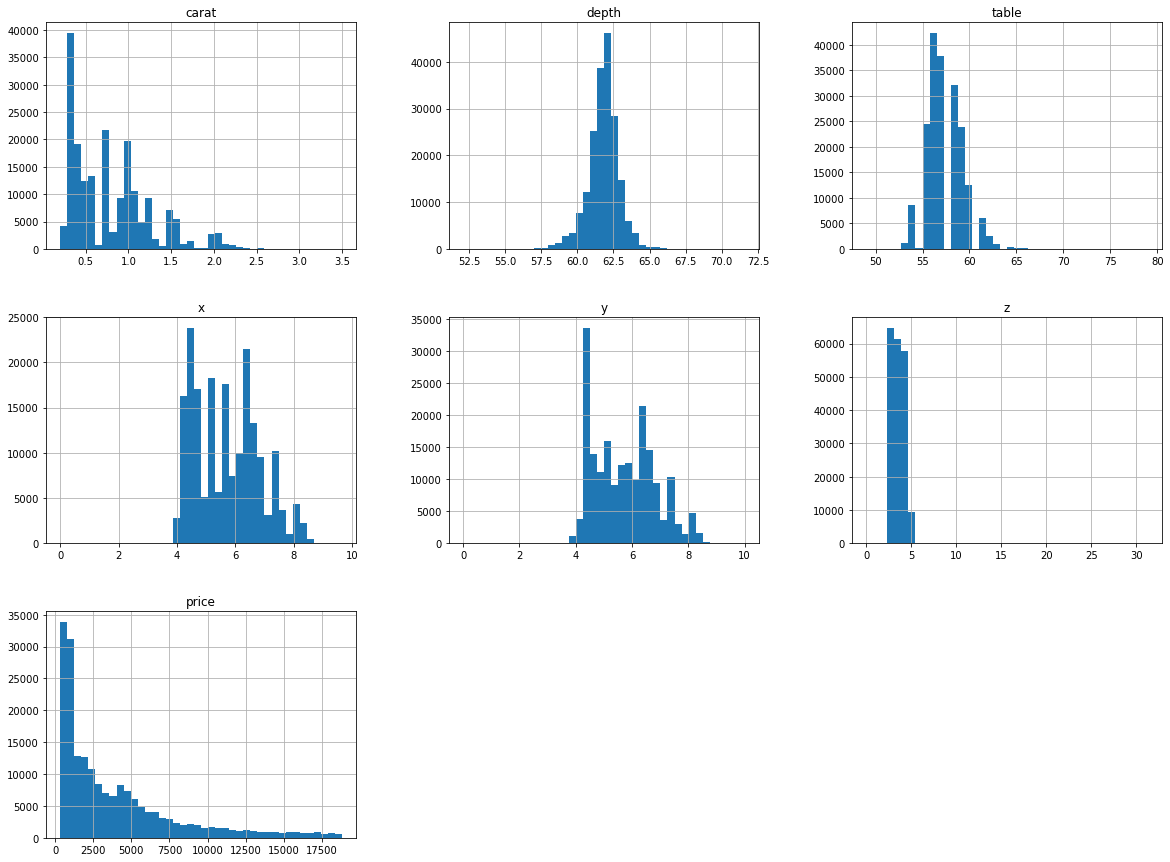

In [6]:
train_df.hist(bins=40, figsize=(20,15));

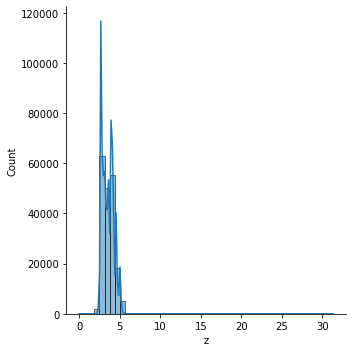

In [7]:
#plt.figure(figsize=(60,5))
sns.displot(data=train_df, x='z', kde=True, bins=50);

In [39]:
#plt.rcParams["figure.figsize"] = (8,5.5)

In [52]:
train_df[train_df['z']>6]

carat        cut color clarity  depth  table     x     y      z  price
id                                                                            
17041    2.01    Premium     I     VS1   59.1   60.0  8.28  8.21   8.18  17640
94237    2.10    Premium     H      I1   61.1   57.0  8.42  8.28   8.35  12512
127668   2.22      Ideal     G     VS2   61.8   57.0  8.36  8.32   8.40  18736
140193   3.50  Very Good     H     SI2   62.8   57.0  9.65  9.59   6.03  18507
167044   0.51    Premium     G     VS2   61.8   58.0  5.20  5.13  31.30   1447

In [13]:
train_df[train_df['z']>5].shape[0]

5100

Notice a few things here:

1. First, `depth`, `table`, `x`, `y`, `z` have inequaly distribution, lots of data in 1 place and others outlier take further away from main data

2. To comprehend the outliers to represent something or just error. We may discuss more deeper in our data and about how good is our data

3. These attributes have little different scales. We will discuss this later in this chapter when we explore feature scaling.

4. Finally, many histograms are tail heavy: they extend much farther to the left of the median than to the right. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

### Understand more about our data
- 1 carat = 0.2 gram
- Depth and Table have unit of %
![Gemstone](DiamondDetail.png)
- Formula:

Average girdle diameter = (minimum diameter + maximum diameter) ÷ 2

                    = (x + y) ÷ 2

`Depth` = (depth ÷ average girdle diameter) x 100

      = (z ÷ average girdle diameter) x 100

`Table` = (average table size ÷ average girdle diameter) x 100

From the knowlegde above
As we can seen from our data, the `Depth` can be calculated by x,y and z so we can check the validation of outliers and some others to decide whether or not it can be an error to replace 

In [55]:
train_df['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

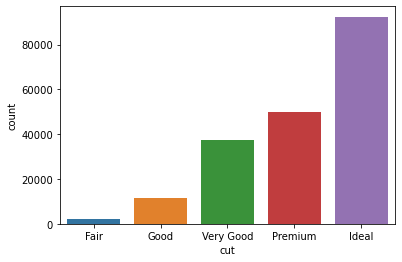

In [18]:
sns.countplot(x=train_df['cut'], order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']);

In [19]:
train_df['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

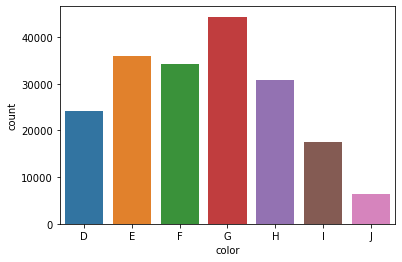

In [21]:
sns.countplot(x=train_df['color'], order=['D', 'E', 'F', 'G', 'H', 'I', 'J']);

In [22]:
train_df['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

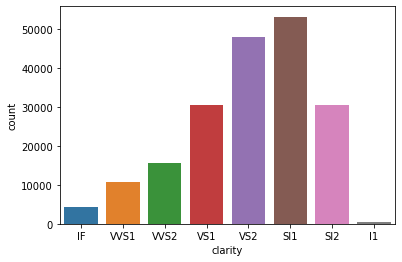

In [23]:
sns.countplot(x=train_df['clarity'], order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']);

In [12]:
train_df[(train_df['carat'] == 0.3) & (train_df['color'] == 'E')
         & (train_df['clarity'] == 'SI1') & (train_df['cut'] == 'Ideal')
        & (train_df['price'] == 499)]

carat    cut color clarity  depth  table     x     y     z  price
id                                                                       
8280      0.3  Ideal     E     SI1   62.3   54.0  4.29  4.32  2.68    499
15084     0.3  Ideal     E     SI1   62.5   58.0  4.28  4.29  2.68    499
23542     0.3  Ideal     E     SI1   61.3   55.0  4.34  4.38  2.67    499
26223     0.3  Ideal     E     SI1   61.1   58.0  4.29  4.32  2.63    499
27774     0.3  Ideal     E     SI1   62.0   54.2  4.32  4.33  2.68    499
28797     0.3  Ideal     E     SI1   61.6   56.0  4.31  4.33  2.67    499
39518     0.3  Ideal     E     SI1   61.7   55.0  4.31  4.36  2.67    499
48425     0.3  Ideal     E     SI1   60.6   56.0  4.39  4.41  2.67    499
49414     0.3  Ideal     E     SI1   61.7   57.0  4.32  4.34  2.67    499
56233     0.3  Ideal     E     SI1   61.8   55.0  4.33  4.36  2.68    499
69060     0.3  Ideal     E     SI1   60.8   58.0  4.35  4.36  2.65    499
85150     0.3  Ideal     E     SI1   61.9   57.0  4.29  4.32  2.66    499
91665     0.3  Ideal     E     SI1   62.3   56.0  4.32  4.30  2.68    499
98861     0.3  Ideal     E     SI1   62.2   58.0  4.25  4.29  2.66    499
114333    0.3  Ideal     E     SI1   61.5   57.0  4.31  4.34  2.66    499
117962    0.3  Ideal     E     SI1   61.9   56.0  4.29  4.34  2.67    499
119080    0.3  Ideal     E     SI1   61.1   58.0  4.28  4.33  2.63    499
119649    0.3  Ideal     E     SI1   61.0   56.0  4.35  4.37  2.66    499
120811    0.3  Ideal     E     SI1   61.2   57.0  4.29  4.33  2.64    499
130480    0.3  Ideal     E     SI1   62.4   58.0  4.27  4.29  2.67    499
134331    0.3  Ideal     E     SI1   62.4   57.0  4.27  4.29  2.67    499
137110    0.3  Ideal     E     SI1   61.6   58.0  4.29  4.30  2.65    499
145810    0.3  Ideal     E     SI1   61.5   58.0  4.32  4.35  2.66    499
163084    0.3  Ideal     E     SI1   61.4   56.0  4.33  4.36  2.67    499

Some datas really have the same with each other make our dataset plentiful but not so diversity

This might cause our model to run slow but not efficiency

# 3. Exploratory Data Analysis (EDA)<a class="anchor" id="eda"></a>

### 3.1 Continuous feature distribution

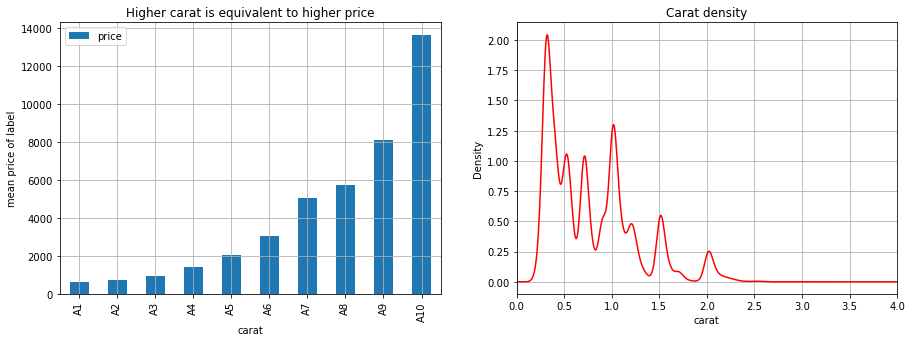

In [139]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
train_df.groupby(by=pd.qcut(train_df.carat,10, labels=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10'])).agg({'price':'mean'}).plot(kind='bar',grid=True, ax=ax[0], title='Higher carat is equivalent to higher price')
train_df.carat.plot(kind='kde',grid=True, ax=ax[1], title='Carat density', color='red', xlim=(0,4));
ax[1].set_xlabel('carat')
ax[0].set_ylabel('mean price of label');

notice here `carat` is important feature that we might think about stratified it later to make our data smaller for validation process

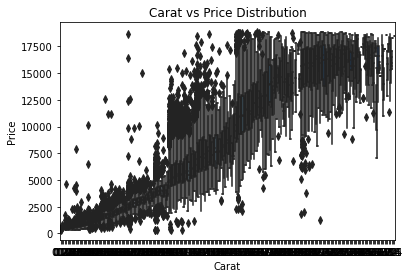

In [32]:
sns.boxplot(data=train_df, x='carat', y='price', palette='Blues')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs Price Distribution')
plt.show()

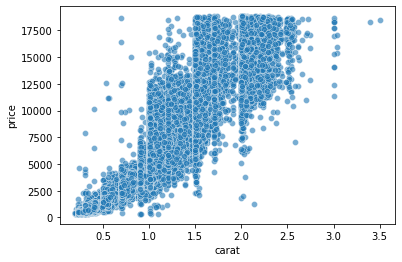

In [38]:
sns.scatterplot(data=train_df, x='carat', y='price', alpha=0.6);

Clearly here, carat show high correlation with price

We can check later by formula and other plot below

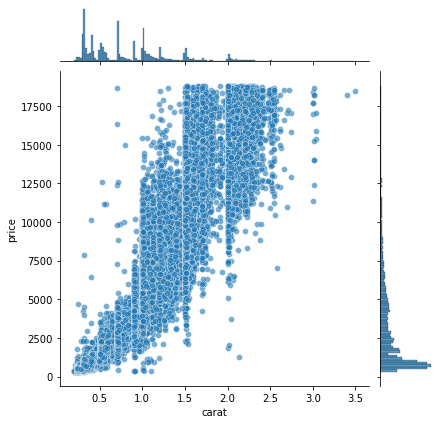

In [4]:
sns.jointplot(data=train_df, x='carat', y='price', alpha=0.6);

We can see from here pretty sure that `carat` will show a strong correlation with our target value `price`

We will go in detail below when calculate .corr()

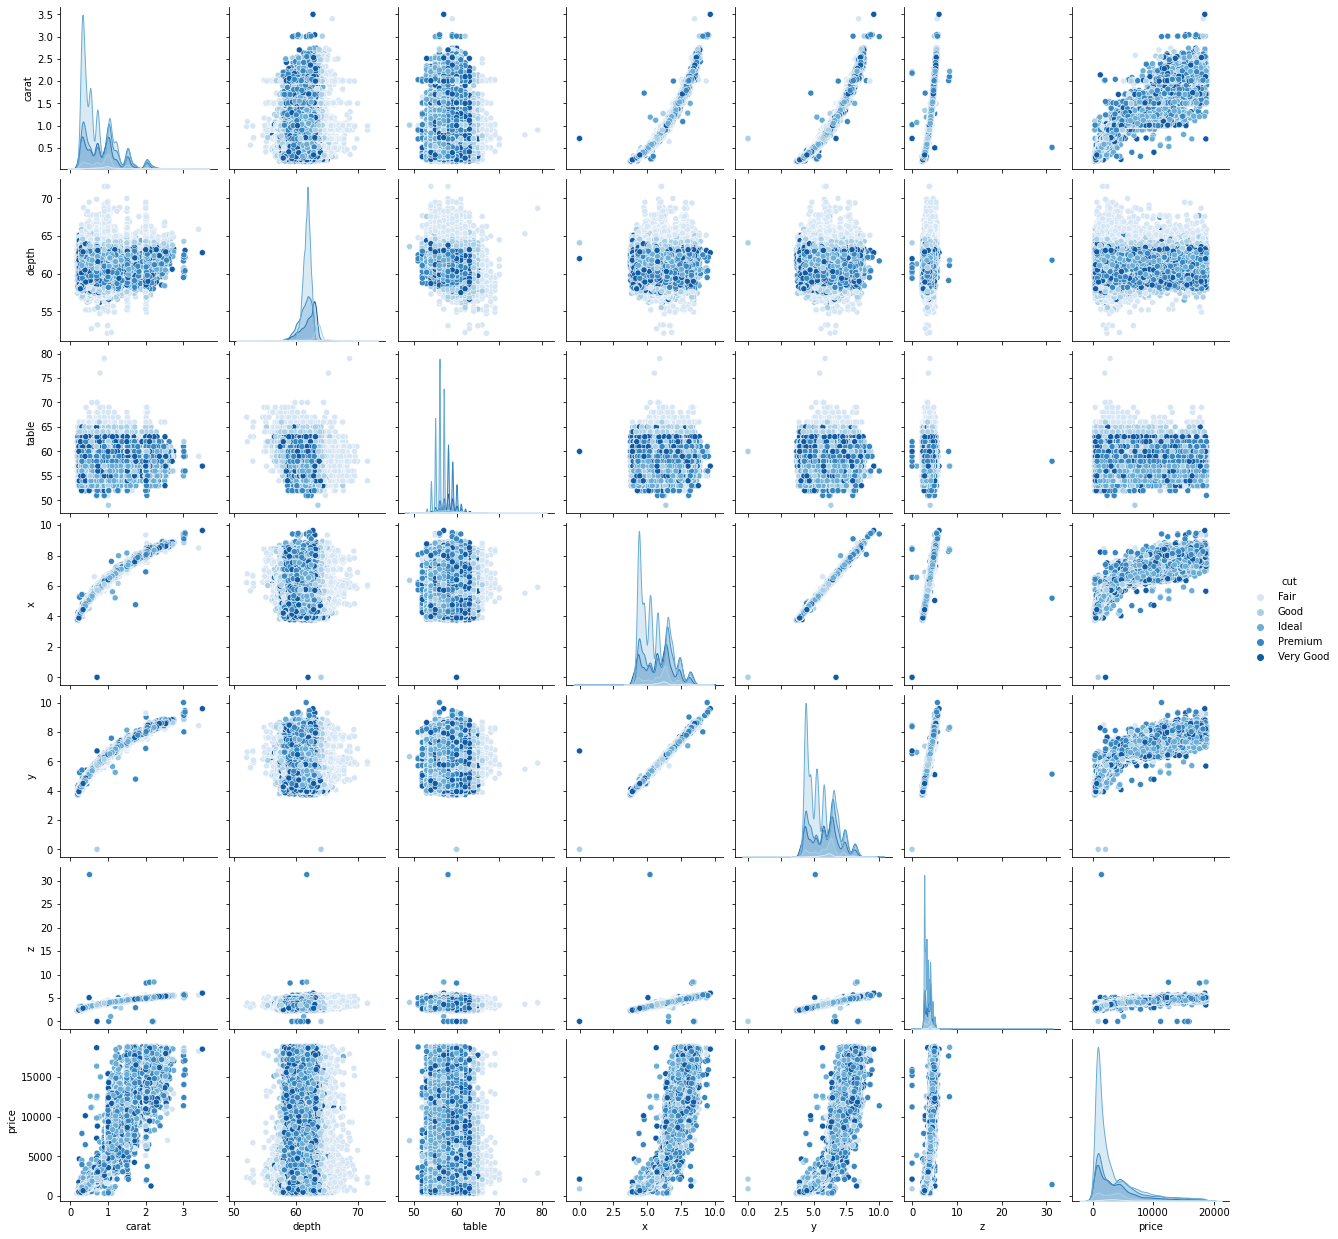

In [39]:
sns.pairplot(data=train_df, hue='cut', palette="Blues");

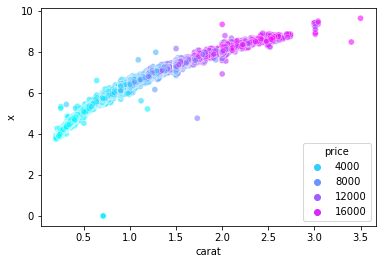

In [6]:
sns.scatterplot(data=train_df, x="carat", y="x", hue="price", palette='cool', alpha=0.6);

#### A few points to notice:

There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.

- "y" and "z" have some dimensional outlies in our dataset that might needs to be eliminated
- The "depth" should be capped but we must examine the regression line to be sure
- The "table" featured should be capped too
- Let's have a look at regression plots to get a close look at the outliers

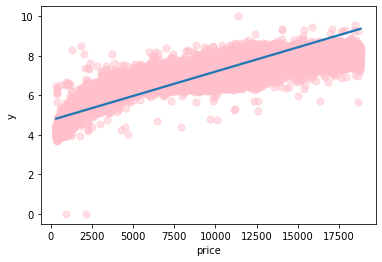

In [22]:
sns.regplot(data=train_df, x='price', y='y', scatter_kws={'alpha': 0.5, 's': 50, 'color': 'pink'});

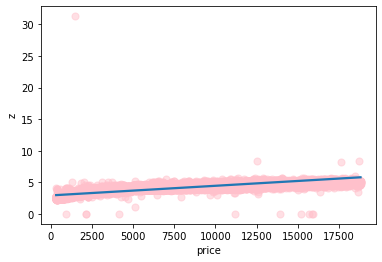

In [23]:
sns.regplot(data=train_df, x='price', y='z', scatter_kws={'alpha': 0.5, 's': 50, 'color': 'pink'});

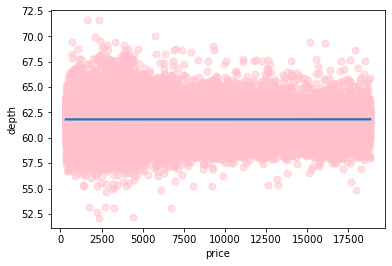

In [24]:
sns.regplot(data=train_df, x='price', y='depth', scatter_kws={'alpha': 0.5, 's': 50, 'color': 'pink'});

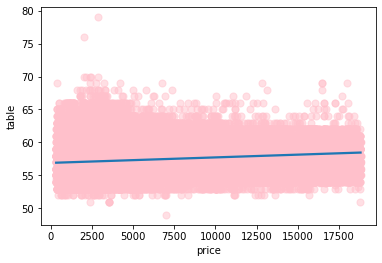

In [25]:
sns.regplot(data=train_df, x='price', y='table', scatter_kws={'alpha': 0.5, 's': 50, 'color': 'pink'});

We can clearly spot outliers in these attributes. We will remove these data points in part 4

In [38]:
train_df[train_df["z"]>=30]

carat      cut color clarity  depth  table    x     y     z  price
id                                                                        
167044   0.51  Premium     G     VS2   61.8   58.0  5.2  5.13  31.3   1447

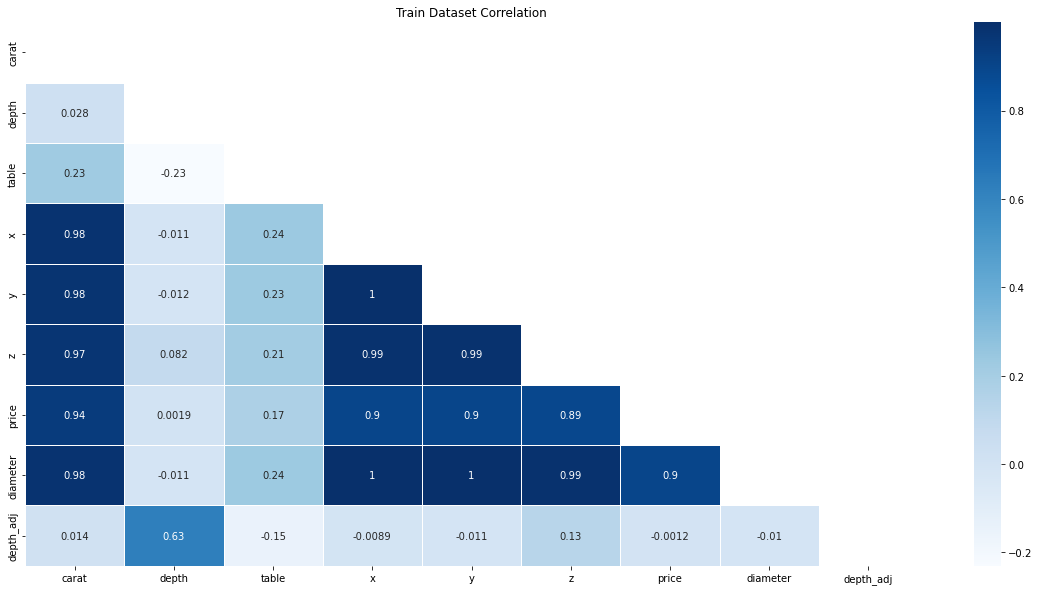

In [18]:
def plot_correlation_heatmap(df, title_name: str='Train correlation'):
    """Draws the correlation heatmap plot.
    
    Args:
        df: train or test dataframes
        title_name: 'Train' or 'Test' (default 'Train correlation')
        
    Returns:
        subplots of size (len(col_list), 2)
    """

    corr = df.corr()
    fig, axes = plt.subplots(figsize=(20, 10))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='Blues', annot=True)
    plt.title(title_name)
    plt.show()

#plot_correlation_heatmap(origin, 'Original Dataset Correlation')
plot_correlation_heatmap(train_df, 'Train Dataset Correlation')
#plot_correlation_heatmap(train, 'Test Dataset Correlation')

All the above plots indicate some understandable findings: 

The dimensions of a diamond (i.e., x, y, and z) show a strong correlation with its `price` and `carat` weight. As the dimensions of a diamond increase, so does its volume, which in turn affects its mass, as mass is equal to volume multiplied by density. We also think about make feature named volume but don't have enough attributes so ignore it.

And beacause our data quite big so we will split stratifed based on `carat` in order to learning faster with cv and also make our data more equaly.

`x` and `y` is highest correlation, which we can think about fusion it into average girdle diameter in the future, also is `z` but still have some outliers in `z` which we might have to take care of it.

`depth`, `cut` and `table` show low correlation. We could consider dropping but let's keep it.

### 3.2 Categorical feature distribution

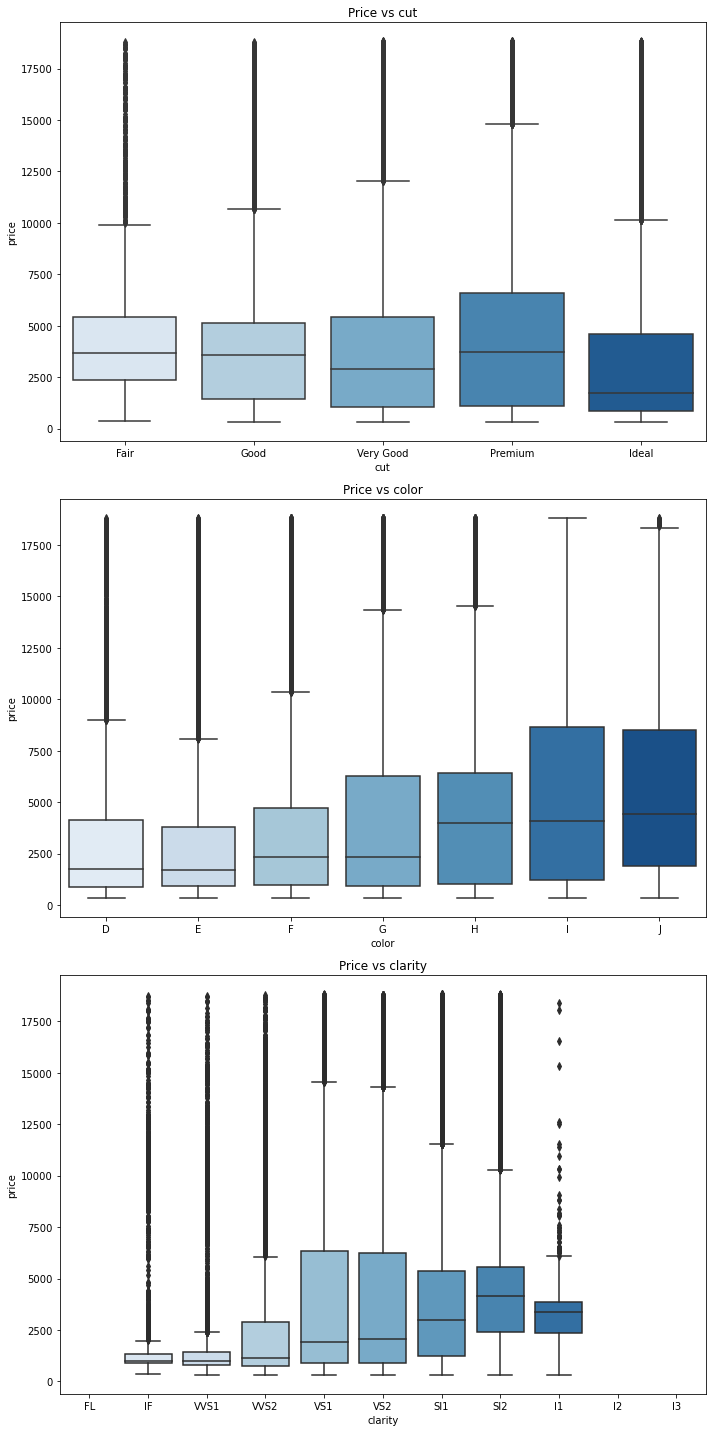

In [49]:
category_orders={'cut': ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                 'color': ['D', 'E', 'F', 'G', 'H', 'I', 'J'],
                 'clarity': ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3']}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i, c in enumerate(cat_features):
    ax = axes[i]
    
    sns.boxplot(data=train_df, x=c, y='price', order=category_orders[c], palette='Blues', ax=ax);
    
    ax.set_title(f'Price vs {c}')
#     ax.set_xlabel('X Variable')
#     ax.set_ylabel('Y Variable')

plt.tight_layout()

# Show the figure
plt.show()

Nothing Noticeable here but we can assume that `price` don't depend much on categorical features 

# 4.  Feature Engineering & Data Wrangling <a class="anchor" id="fe-dw"></a>

x, y, z can not be 0 (Data error maybe, we will discard it)

Diamonds can not be 2 dimensional or 1 dimensional

In [12]:
train_df[train_df['x'] == 0]

carat        cut color clarity  depth  table    x     y    z  price
id                                                                         
92703    0.71       Good     F     SI1   64.1   60.0  0.0  0.00  0.0   2130
170318   0.71       Good     D     VS2   64.1   60.0  0.0  0.00  0.0    910
178000   0.71  Very Good     F     SI2   62.0   60.0  0.0  6.71  0.0   2130

In [13]:
train_df[train_df['y'] == 0]

carat   cut color clarity  depth  table    x    y    z  price
id                                                                   
92703    0.71  Good     F     SI1   64.1   60.0  0.0  0.0  0.0   2130
170318   0.71  Good     D     VS2   64.1   60.0  0.0  0.0  0.0    910

In [14]:
train_df[train_df['z'] == 0]

carat        cut color clarity  depth  table     x     y    z  price
id                                                                          
8750     1.02    Premium     H     SI2   59.4   61.0  6.57  6.53  0.0   4144
39413    2.18    Premium     H     SI2   59.4   60.0  8.46  8.41  0.0  15842
92703    0.71       Good     F     SI1   64.1   60.0  0.00  0.00  0.0   2130
98719    2.17    Premium     H     SI2   60.3   57.0  8.42  8.36  0.0  15923
99624    2.20    Premium     I     SI2   60.1   60.0  8.45  8.41  0.0  11221
117161   2.20    Premium     F     SI2   60.3   58.0  8.49  8.45  0.0  15188
151690   2.18    Premium     I     VS2   61.2   62.0  8.45  8.37  0.0  15701
159429   2.18    Premium     H     SI2   60.8   59.0  8.42  8.38  0.0  13938
170318   0.71       Good     D     VS2   64.1   60.0  0.00  0.00  0.0    910
178000   0.71  Very Good     F     SI2   62.0   60.0  0.00  6.71  0.0   2130

In [267]:
# since there is no row where x = 0 or y = 0 and z is non-zero, so we just need to drop the rows which z = 0
print(train_df[train_df['z'] == 0].shape[0])
train_df = train_df.drop(train_df[(train_df['z'] == 0) | (train_df['z'] > 30)].index)
print(train_df.shape)

10
(193562, 12)


We can calculate the `depth` again to correct it if necessary

But before that we also need to calculate and add Average girdle diameter, write shorten form `diameter` round up it to 2 digits

### NOTE: depth make by divided by diameter so it can not be 0, so we move this part after we eliminate 0 value

After that we calculate the average of depth error

In [269]:
train_df['diameter'] = round((train_df.x + train_df.y)/2, 2)
train_df['depth_adj'] = round((train_df.z/train_df.diameter)*100, 1)
train_df

carat        cut color clarity  table     x     y     z  price  \
id                                                                       
0        1.52    Premium     F     VS2   58.0  7.27  7.33  4.55  13619   
1        2.03  Very Good     J     SI2   58.0  8.06  8.12  5.05  13387   
2        0.70      Ideal     G     VS1   57.0  5.69  5.73  3.50   2772   
3        0.32      Ideal     G     VS1   56.0  4.38  4.41  2.71    666   
4        1.70    Premium     G     VS2   59.0  7.65  7.61  4.77  14453   
...       ...        ...   ...     ...    ...   ...   ...   ...    ...   
193568   0.31      Ideal     D    VVS2   56.0  4.35  4.39  2.67   1130   
193569   0.70    Premium     G    VVS2   58.0  5.75  5.77  3.47   2874   
193570   0.73  Very Good     F     SI1   57.0  5.72  5.75  3.62   3036   
193571   0.34  Very Good     D     SI1   55.0  4.45  4.49  2.81    681   
193572   0.71       Good     E     SI2   64.0  5.73  5.71  3.48   2258   

        diameter  depth_adj weight_cat  
id                                      
0           7.30       62.3          3  
1           8.09       62.4          3  
2           5.71       61.3          2  
3           4.39       61.7          1  
4           7.63       62.5          3  
...          ...        ...        ...  
193568      4.37       61.1          1  
193569      5.76       60.2          2  
193570      5.74       63.1          2  
193571      4.47       62.9          1  
193572      5.72       60.8          2  

[193562 rows x 12 columns]

In [15]:
abs(train_df['depth_adj'] - train_df['depth']).mean()

0.10831632837563883

Not so much error to affect our bad to our prediction but we still get eliminate of it

In [20]:
train_df.drop('depth', axis = 1, inplace = True)
train_df

carat        cut color clarity  table     x     y     z  price  \
id                                                                       
0        1.52    Premium     F     VS2   58.0  7.27  7.33  4.55  13619   
1        2.03  Very Good     J     SI2   58.0  8.06  8.12  5.05  13387   
2        0.70      Ideal     G     VS1   57.0  5.69  5.73  3.50   2772   
3        0.32      Ideal     G     VS1   56.0  4.38  4.41  2.71    666   
4        1.70    Premium     G     VS2   59.0  7.65  7.61  4.77  14453   
...       ...        ...   ...     ...    ...   ...   ...   ...    ...   
193568   0.31      Ideal     D    VVS2   56.0  4.35  4.39  2.67   1130   
193569   0.70    Premium     G    VVS2   58.0  5.75  5.77  3.47   2874   
193570   0.73  Very Good     F     SI1   57.0  5.72  5.75  3.62   3036   
193571   0.34  Very Good     D     SI1   55.0  4.45  4.49  2.81    681   
193572   0.71       Good     E     SI2   64.0  5.73  5.71  3.48   2258   

        diameter  depth_adj  
id                           
0           7.30       62.3  
1           8.09       62.4  
2           5.71       61.3  
3           4.39       61.7  
4           7.63       62.5  
...          ...        ...  
193568      4.37       61.1  
193569      5.76       60.2  
193570      5.74       63.1  
193571      4.47       62.9  
193572      5.72       60.8  

[193573 rows x 11 columns]

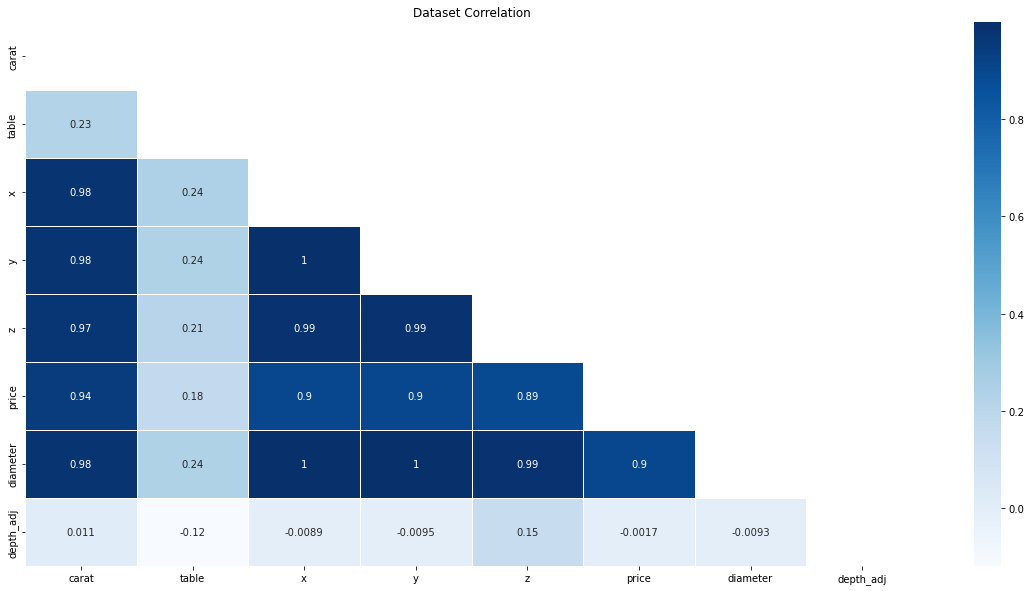

In [32]:
plot_correlation_heatmap(stra_use_set, 'Dataset Correlation')
# X = train_df.drop(['price'], axis=1)
# y = train_df['price']

the `depth_adj` quite the same correlation with the first `depth` and `diameter` show good correlation as we expected

### split the data stratified based on carat 

We want to ensure that the test set is representative of the various categories of incomes in the whole dataset

So `carat` will be divined into 0-0.5-1.5-inf

Also we want to minimize our datasets by taking only 50% for validation model

In [22]:
train_df['weight_cat'] = pd.cut(train_df['carat'],
                               bins=[0., 0.5, 1.5, np.inf],
                               labels=[1, 2, 3])

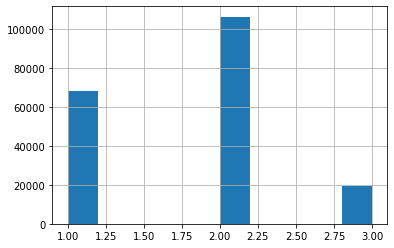

In [23]:
train_df['weight_cat'].hist();

In [106]:
from sklearn.model_selection import StratifiedShuffleSplit

spliting = StratifiedShuffleSplit(n_splits=1, test_size=0.6, random_state=21)
for use_index, leave_index in spliting.split(train_df, train_df['weight_cat']):
    stra_use_set = train_df.loc[use_index]
    stra_leave_set = train_df.loc[leave_index]

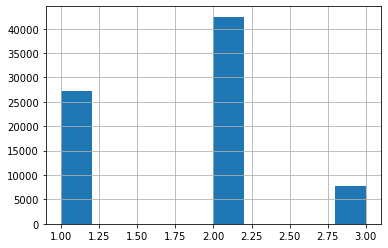

In [107]:
stra_use_set['weight_cat'].hist();

In [108]:
stra_use_set.iloc[:, 11]

id
105151    1
95260     3
132084    1
90185     1
149920    1
         ..
9230      2
36828     2
20315     3
100821    2
86808     1
Name: weight_cat, Length: 77429, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [109]:
y = stra_use_set['price']
X = stra_use_set.drop('price', axis=1)

In [110]:
stra_use_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77429 entries, 105151 to 86808
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   carat       77429 non-null  float64 
 1   cut         77429 non-null  category
 2   color       77429 non-null  category
 3   clarity     77429 non-null  category
 4   table       77429 non-null  float64 
 5   x           77429 non-null  float64 
 6   y           77429 non-null  float64 
 7   z           77429 non-null  float64 
 8   price       77429 non-null  int64   
 9   diameter    77429 non-null  float64 
 10  depth_adj   77429 non-null  float64 
 11  weight_cat  77429 non-null  category
dtypes: category(4), float64(7), int64(1)
memory usage: 5.6 MB


we will add `weight_cat` as a new attribute

In [111]:
num_features = ['carat', 'depth_adj', 'table', 'x', 'y', 'z', 'diameter']

In [114]:
cat_features.append('weight_cat')
cat_features

['cut', 'color', 'clarity', 'weight_cat']

In [115]:
X

carat        cut color clarity  table     x     y     z  diameter  \
id                                                                          
105151   0.34    Premium     E    VVS2   59.0  4.50  4.47  2.77      4.48   
95260    1.53      Ideal     G     SI2   57.0  7.33  7.37  4.61      7.35   
132084   0.31      Ideal     D     VS2   56.0  4.37  4.33  2.66      4.35   
90185    0.30    Premium     H    VVS2   60.0  4.28  4.24  2.67      4.26   
149920   0.35       Good     F     VS2   61.0  4.65  4.69  2.70      4.67   
...       ...        ...   ...     ...    ...   ...   ...   ...       ...   
9230     1.07      Ideal     F    VVS2   56.0  6.60  6.65  4.03      6.62   
36828    1.04      Ideal     G     VS1   56.0  6.49  6.53  3.99      6.51   
20315    1.52  Very Good     G    VVS2   58.0  7.28  7.34  4.57      7.31   
100821   1.06    Premium     G     SI1   60.0  6.55  6.53  4.01      6.54   
86808    0.38  Very Good     E     SI1   56.0  4.58  4.61  2.89      4.60   

        depth_adj weight_cat  
id                            
105151       61.8          1  
95260        62.7          3  
132084       61.1          1  
90185        62.7          1  
149920       57.8          1  
...           ...        ...  
9230         60.9          2  
36828        61.3          2  
20315        62.5          3  
100821       61.3          2  
86808        62.8          1  

[77429 rows x 11 columns]

In [116]:
category_order = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                  ['D', 'E', 'F', 'G', 'H', 'I', 'J'],
                  ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'],
                  ['1', '2', '3']]

In [117]:
# preprocess pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
#from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


num_transformer = Pipeline(steps =[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories = category_order))
])

In [118]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [119]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['carat', 'depth_adj', 'table', 'x', 'y', 'z',
                                  'diameter']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['D',
                                              

In [120]:
X = preprocessor.transform(X)
X.shape

(77429, 11)

# 5. Model Training <a class="anchor" id="model-training"></a>

## 5.1 Training and Evaluating on the Training Set

In [81]:
X

array([[-1.01684101,  0.18350305, -1.15765084, ...,  5.        ,
         3.        ,  0.        ],
       [-0.19524163, -0.15308456, -0.63755093, ...,  2.        ,
         5.        ,  1.        ],
       [ 0.79932605, -0.05691667,  0.40264887, ...,  4.        ,
         5.        ,  1.        ],
       ...,
       [ 0.60473672, -0.20116851, -0.63755093, ...,  1.        ,
         1.        ,  1.        ],
       [-0.17362059, -1.35518317,  1.96294858, ...,  1.        ,
         6.        ,  1.        ],
       [-0.88711479,  0.47200672, -0.63755093, ...,  1.        ,
         5.        ,  0.        ]])

As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 1, )

In [84]:
X_train.shape, X_val.shape

((77428, 11), (19358, 11))

In [85]:
# from sklearn.preprocessing import PolynomialFeatures
# sklearn model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [86]:
li_reg = LinearRegression()
li_reg.fit(X, y)

LinearRegression()

In [87]:
y_pred = li_reg.predict(X)
li_mse = mean_squared_error(y, y_pred)
li_rmse = np.sqrt(li_mse)
li_rmse

1007.3596457283573

In [88]:
tree_reg = DecisionTreeRegressor(random_state=1)
tree_reg.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [89]:
y_pred = tree_reg.predict(X)
tree_mse = mean_squared_error(y_pred, y)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

20.517859797117193

## 5.2 Cross-Validation

In [93]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X, y,
                         scoring="neg_root_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [94]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [95]:
display_scores(tree_rmse_scores)

Scores: [28.58017215 29.77633612 29.00444439 29.20501845 28.27913657 28.6190179
 29.32918075 28.49834115 29.17923323 29.2806348 ]
Mean: 28.975151550348123
Standard deviation: 0.441647428307922


In [96]:
lin_scores = cross_val_score(li_reg, X, y,                           
                             scoring="neg_root_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [32.16748978 31.96325707 31.73939744 31.85333637 31.00614967 32.40925765
 31.78746729 31.64471897 31.78142032 32.09086482]
Mean: 31.844335937284274
Standard deviation: 0.3548481847021937


In [121]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=1)


forest_scores = cross_val_score(forest_reg, X, y,                          
                             scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)
#too time-consuming

Scores: [622.16423184 604.83887339 641.46174695 614.58708385 620.92406246]
Mean: 620.7951996980535
Standard deviation: 12.01783742465181


## 5.3 Model Comparsion

In [133]:
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor #!pip install xgboost
seed = 21
models = [
    LinearSVR(random_state=seed),
    #SVR(),  Something wrong
    KNeighborsRegressor(),
    LinearRegression(),
    DecisionTreeRegressor(random_state=seed),
    RandomForestRegressor(random_state=seed),
    ExtraTreesRegressor(random_state=seed),
    AdaBoostRegressor(random_state=seed),
    GradientBoostingRegressor(random_state=seed),
    XGBRegressor(random_state=seed)    
]

In [134]:
from sklearn.linear_model import Ridge, Lasso , ElasticNet

In [137]:
models1 = [
    Ridge(random_state=seed),
    Lasso(random_state=seed),
    ElasticNet(random_state=seed)
]

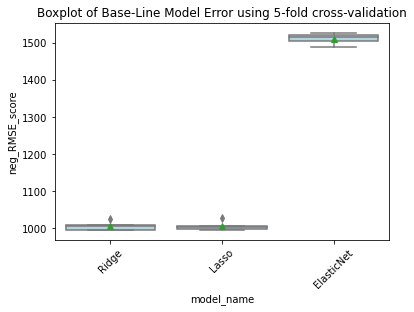

Mean  Standard Deviation
model_name                                 
ElasticNet  1511.415710           15.211671
Lasso       1007.104213           12.653273
Ridge       1006.635587           12.587567

In [138]:
generate_baseline_results_c(models1, X, y, metrics='neg_root_mean_squared_error', cv=5, plot_results=True)

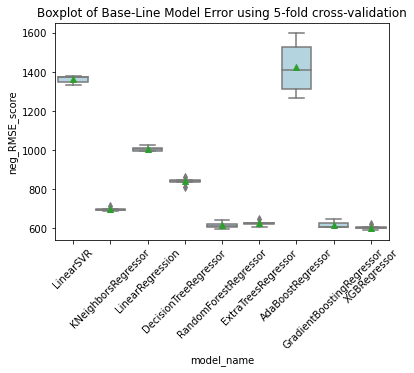

Mean  Standard Deviation
model_name                                                
AdaBoostRegressor          1423.604364          141.597008
LinearSVR                  1361.930940           19.164501
LinearRegression           1006.734560           12.626818
DecisionTreeRegressor       840.482915           18.479804
KNeighborsRegressor         697.302354           10.028579
ExtraTreesRegressor         626.817888           15.282237
GradientBoostingRegressor   618.819287           18.465751
RandomForestRegressor       615.858095           17.776939
XGBRegressor                604.070085           12.273553

In [126]:
from sklearn.model_selection import KFold
def generate_baseline_results_c(models, X, y, metrics, cv=5, plot_results=False):
    # define k-fold:
    kfold = KFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X,y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, -score))
    
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'neg_RMSE_score'])
    if plot_results:
        sns.boxplot(x='model_name', y='neg_RMSE_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title("Boxplot of Base-Line Model Error using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()
    
    # Summary result
    mean = cv_df.groupby('model_name')['neg_RMSE_score'].mean()
    std = cv_df.groupby('model_name')['neg_RMSE_score'].std()
    
    baseline_results = pd.concat([mean, std], axis = 1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']
    
    # sort by error
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)
    
    return baseline_results
    
generate_baseline_results_c(models, X, y, metrics='neg_root_mean_squared_error', cv=5, plot_results=True)


In [99]:
def generate_baseline_results(models, X_train, y_train, X_val, y_val):
    res = []
    for model in models:
        model_name = model.__class__.__name__
        model_reg = model
        model_reg.fit(X_train, y_train)
        y_pred = model_reg.predict(X_val)
        model_mse = mean_squared_error(y_pred, y_val)
        model_rmse = np.sqrt(model_mse)
        res.append((model_name, model_rmse))
    
    df = pd.DataFrame(res, columns=['model_name', 'rmse'])
    
    df_sorted = df.sort_values(by='rmse', ascending=False)
    return df_sorted
    
generate_baseline_results(models, X_train, y_train, X_val, y_val)

model_name         rmse
0                  LinearSVR  1292.156045
6          AdaBoostRegressor  1266.140374
2           LinearRegression  1020.904575
3      DecisionTreeRegressor   832.560999
1        KNeighborsRegressor   656.924188
5        ExtraTreesRegressor   615.357925
4      RandomForestRegressor   597.356664
7  GradientBoostingRegressor   596.781838
8               XGBRegressor   583.272425

In [100]:
model_reg = LinearSVR(random_state=seed)
model_reg.fit(X_train, y_train)
y_pred = model_reg.predict(X_val)
model_mse = mean_squared_error(y_val, y_pred)
model_rmse = np.sqrt(model_mse)
model_rmse

1292.1560447777558

## 5.4 Fine-Tune Model


- RandomForestRegressor
- GradientBoostingRegressor
- XGBRegressor

### 5.4.1 Randomized Search
- minimize searching space for hyperparameter

In [128]:
g_boost = GradientBoostingRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [152]:
from sklearn.model_selection import RandomizedSearchCV

# Setup random seed
np.random.seed(42)

param_grid = [
    {'learning_rate': [0.2, 0.3, 0.4], 'n_estimators':range(70,121,10)}
  ]

randomized_search = RandomizedSearchCV(g_boost, 
                           param_distributions=param_grid,
                           cv=5,
                           n_iter=10,
                           n_jobs = 4,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True,
                                      verbose=True)

randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=4,
                   param_distributions=[{'learning_rate': [0.2, 0.3, 0.4],
                                         'n_estimators': range(70, 121, 10)}],
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=True)

In [153]:
cvres = randomized_search.cv_results_
for RMSE, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-RMSE, params)

620.6984358420343 {'n_estimators': 70, 'learning_rate': 0.2}
616.7227972858876 {'n_estimators': 80, 'learning_rate': 0.2}
611.5384749915653 {'n_estimators': 90, 'learning_rate': 0.3}
609.8619938079859 {'n_estimators': 120, 'learning_rate': 0.2}
612.6080473911197 {'n_estimators': 100, 'learning_rate': 0.2}
612.9367485267964 {'n_estimators': 80, 'learning_rate': 0.4}
608.7791863555758 {'n_estimators': 110, 'learning_rate': 0.4}
609.860377442158 {'n_estimators': 100, 'learning_rate': 0.4}
607.6510815785266 {'n_estimators': 120, 'learning_rate': 0.3}
614.2798562928157 {'n_estimators': 90, 'learning_rate': 0.2}


In [154]:
np.random.seed(42)

param_grid = [
    {'n_estimators':range(30,191,10)}
  ]

randomized_search = RandomizedSearchCV(rf, 
                           param_distributions=param_grid,
                           cv=5,
                           n_iter=10,
                           n_jobs = 4,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True,
                                      verbose=True)

randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions=[{'n_estimators': range(30, 191, 10)}],
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=True)

In [155]:
cvres = randomized_search.cv_results_
for RMSE, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-RMSE, params)

631.1665562126595 {'n_estimators': 30}
626.9613766359968 {'n_estimators': 40}
622.309721127151 {'n_estimators': 80}
622.4532655141468 {'n_estimators': 180}
622.1709507532586 {'n_estimators': 140}
621.8612769731329 {'n_estimators': 170}
623.1756705757191 {'n_estimators': 110}
622.3368035356981 {'n_estimators': 160}
627.0529790717068 {'n_estimators': 50}
623.5582997003609 {'n_estimators': 120}


In [161]:
np.random.seed(42)

param_grid = [
    {'learning_rate': [0.05, 0.1, 0.3], 'n_estimators':range(90,151,10)}
  ]

randomized_search = RandomizedSearchCV(xgb, 
                           param_distributions=param_grid,
                           cv=5,
                           n_iter=10,
                           n_jobs = 4,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True,
                                      verbose=True)

randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                            

In [162]:
cvres = randomized_search.cv_results_
for RMSE, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-RMSE, params)

593.87910624141 {'n_estimators': 90, 'learning_rate': 0.05}
613.1928026849126 {'n_estimators': 120, 'learning_rate': 0.3}
610.5548914094418 {'n_estimators': 100, 'learning_rate': 0.3}
590.2071519805221 {'n_estimators': 100, 'learning_rate': 0.05}
589.9403313094766 {'n_estimators': 100, 'learning_rate': 0.1}
587.0622018256261 {'n_estimators': 140, 'learning_rate': 0.05}
591.6623901692628 {'n_estimators': 130, 'learning_rate': 0.1}
587.3865760662197 {'n_estimators': 120, 'learning_rate': 0.05}
614.5295183000322 {'n_estimators': 130, 'learning_rate': 0.3}
611.6250891441057 {'n_estimators': 110, 'learning_rate': 0.3}


### 5.4.2 Grid Search
- specific tune hyperparameter

In [167]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

param_grid = [
    {'learning_rate': [0.3, 0.4], 'n_estimators':range(150,181,10)}
  ]

grid_search = GridSearchCV(g_boost, 
                           param_grid,
                           cv=5,
                           n_jobs = 4,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=4,
             param_grid=[{'learning_rate': [0.3, 0.4],
                          'n_estimators': range(150, 181, 10)}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [169]:
cvres = grid_search.cv_results_
for RMSE, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-RMSE, params)

605.5936010846717 {'learning_rate': 0.3, 'n_estimators': 150}
604.5499562268145 {'learning_rate': 0.3, 'n_estimators': 160}
604.7302890816964 {'learning_rate': 0.3, 'n_estimators': 170}
604.2384533106027 {'learning_rate': 0.3, 'n_estimators': 180}
606.6911024964187 {'learning_rate': 0.4, 'n_estimators': 150}
606.1120089412714 {'learning_rate': 0.4, 'n_estimators': 160}
605.9317963047633 {'learning_rate': 0.4, 'n_estimators': 170}
606.4091837334738 {'learning_rate': 0.4, 'n_estimators': 180}


for GradientBoosting, we see that we can still make our model better by increase `n_estimators` 

for RandomForest, we just make our model worse so we decide not to tuning further here(using grid search)

In [170]:
np.random.seed(42)

param_grid = [
    {'learning_rate': [0.3], 'n_estimators':range(190,231,10)}
  ]

grid_search = GridSearchCV(g_boost, 
                           param_grid,
                           cv=5,
                           n_jobs = 4,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

cvres = grid_search.cv_results_
for RMSE, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-RMSE, params)

603.9155895558239 {'learning_rate': 0.3, 'n_estimators': 190}
603.7115268642093 {'learning_rate': 0.3, 'n_estimators': 200}
604.0201628337064 {'learning_rate': 0.3, 'n_estimators': 210}
604.0821133076533 {'learning_rate': 0.3, 'n_estimators': 220}
604.528090651974 {'learning_rate': 0.3, 'n_estimators': 230}


In [172]:
np.random.seed(42)

param_grid = [
    {'learning_rate': [0.05, 0.1], 'n_estimators':range(120,151,10)}
  ]

grid_search = GridSearchCV(xgb, 
                           param_grid,
                           cv=5,
                           n_jobs = 4,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [174]:
cvres = grid_search.cv_results_
for RMSE, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-RMSE, params)

587.3865760662197 {'learning_rate': 0.05, 'n_estimators': 120}
587.0276884603251 {'learning_rate': 0.05, 'n_estimators': 130}
587.0622018256261 {'learning_rate': 0.05, 'n_estimators': 140}
587.2164882198028 {'learning_rate': 0.05, 'n_estimators': 150}
591.1602189109846 {'learning_rate': 0.1, 'n_estimators': 120}
591.6623901692628 {'learning_rate': 0.1, 'n_estimators': 130}
591.8973054872204 {'learning_rate': 0.1, 'n_estimators': 140}
592.493401872275 {'learning_rate': 0.1, 'n_estimators': 150}


after doing `randomizedSearch` and `GridSearch` for 3 best model, RandomForest show that we can not control it so we will leave it default. 

For GradientBoosting we choose 'learning_rate': 0.3, 'n_estimators': 200

For XGBoosting we choose 'learning_rate': 0.05, 'n_estimators': 130

# 6. Submission

In [313]:
X_final = train_df.drop('price', axis = 1)
y_final = train_df['price']

In [304]:
test_df = pd.read_csv('test.csv', index_col = 'id')

Because depth make by divided by diameter so it can not be 0 but in test_df has some 0 one so we need to be careful, take the original depth

In [305]:
test_df['diameter'] = round((test_df.x + test_df.y)/2, 2)
test_df['depth_adj'] = round((test_df.z/test_df.diameter)*100, 1)

In [307]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129050 entries, 193573 to 322622
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   carat      129050 non-null  float64
 1   cut        129050 non-null  object 
 2   color      129050 non-null  object 
 3   clarity    129050 non-null  object 
 4   depth      129050 non-null  float64
 5   table      129050 non-null  float64
 6   x          129050 non-null  float64
 7   y          129050 non-null  float64
 8   z          129050 non-null  float64
 9   diameter   129050 non-null  float64
 10  depth_adj  129047 non-null  float64
dtypes: float64(8), object(3)
memory usage: 11.8+ MB


In [311]:
null_rows = test_df[test_df['depth_adj'].isnull()]
null_index = null_rows.index
test_df.loc[null_index, 'depth_adj'] = null_rows['depth']

In [315]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129050 entries, 193573 to 322622
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   carat       129050 non-null  float64 
 1   cut         129050 non-null  object  
 2   color       129050 non-null  object  
 3   clarity     129050 non-null  object  
 4   table       129050 non-null  float64 
 5   x           129050 non-null  float64 
 6   y           129050 non-null  float64 
 7   z           129050 non-null  float64 
 8   diameter    129050 non-null  float64 
 9   depth_adj   129050 non-null  float64 
 10  weight_cat  129050 non-null  category
dtypes: category(1), float64(7), object(3)
memory usage: 15.0+ MB


In [314]:
test_df.drop('depth', axis = 1, inplace = True)
test_df['weight_cat'] = pd.cut(test_df['carat'],
                               bins=[0., 0.5, 1.5, np.inf],
                               labels=[1, 2, 3])

In [316]:
convert_cat(test_df, cat_features)

In [317]:
X_test = preprocessor.transform(test_df)
X_final = preprocessor.transform(X_final)

In [319]:
model_reg1 = XGBRegressor(learning_rate = 0.05, n_estimators = 130)
model_reg1.fit(X_final, y_final)
y_pred1 = model_reg1.predict(X_test)
y_pred1

array([ 861.91034, 2492.809  , 2344.303  , ..., 7585.7754 , 6161.3267 ,
       4317.144  ], dtype=float32)

In [354]:
model_reg2 = GradientBoostingRegressor(learning_rate = 0.3, n_estimators = 200)
model_reg2.fit(X_final, y_final)
y_pred2 = model_reg2.predict(X_test)
y_pred2

array([ 841.49693791, 2560.24676578, 2284.30094426, ..., 8042.67181273,
       5857.73460886, 4174.97814708])

In [362]:
df_prediction = pd.DataFrame({'id': test_df.index,
                       'price': y_pred})
df_prediction.head(10)

id         price
0  193573    864.383127
1  193574   2487.950698
2  193575   2348.721298
3  193576    853.781138
4  193577   5804.443723
5  193578    659.562504
6  193579  12297.115034
7  193580   2978.564864
8  193581  15186.512655
9  193582   1891.663590

In [363]:
df_prediction.to_csv('submission4.csv', index=False)

In [361]:
y_pred = (y_pred1 + y_pred2)/2
y_pred

array([ 864.38312653, 2487.95069752, 2348.72129777, ..., 7693.03841929,
       6097.79367115, 4308.96873318])

### My Major Voting method

the ideal is we take 3 best method fusion it by mathematics below to give our final prediction(the ideal is based on bagging of ensemble)

we have min(RMSE) : meaning of best model and max(RMSE) and middle(RMSE)

we take percentage error of RMSE by: p_error = (RMSE - min(RMSE))/min(RMSE)*100 : unit (%)

then based on our best model prediction: 
- if prediction of best model > prediction(p) of model: p + p*p_error
- if prediction of best model < prediction(p) of model: p - p*p_error

finally we take the average of 3 models prediction 

In [325]:
forest_reg = RandomForestRegressor(random_state=21)


forest_scores = cross_val_score(forest_reg, X, y,                          
                             scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [623.82034505 600.66572869 643.53099662 611.68590612 624.57711447]
Mean: 620.8560181877635
Standard deviation: 14.342434825298701


In [331]:
g_boost_reg = GradientBoostingRegressor(learning_rate = 0.3, n_estimators = 200, random_state=21)


g_boost_scores = cross_val_score(g_boost_reg, X, y,                          
                             scoring="neg_mean_squared_error", cv=5)
g_boost_rmse_scores = np.sqrt(-g_boost_scores)
display_scores(g_boost_rmse_scores)

Scores: [595.30687199 585.9721496  616.21382335 590.9533878  608.33192814]
Mean: 599.355632175764
Standard deviation: 11.232811527157345


In [330]:
xgb_reg = XGBRegressor(learning_rate = 0.05, n_estimators = 130, random_state=21)


xgb_scores = cross_val_score(xgb_reg, X, y,                          
                             scoring="neg_mean_squared_error", cv=5)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

Scores: [577.70316139 564.97078275 607.1336065  573.37065687 585.93229877]
Mean: 581.822101254704
Standard deviation: 14.352181259086743


In [334]:
rf_p_error = (forest_rmse_scores.mean() - xgb_rmse_scores.mean())/xgb_rmse_scores.mean()*100
g_boost_p_error = (g_boost_rmse_scores.mean() - xgb_rmse_scores.mean())/xgb_rmse_scores.mean()*100

In [353]:
model_reg3 = RandomForestRegressor()
model_reg3.fit(X_final, y_final)
y_pred3 = model_reg3.predict(X_test)
y_pred3

array([ 854.8  , 2416.22 , 2211.536, ..., 7255.46 , 5827.32 , 4326.25 ])

In [346]:
y_pred3[0] -= 1
y_pred3

array([ 867.22 , 2379.01 , 2165.836, ..., 7187.33 , 5707.08 , 4313.76 ])

In [355]:
def MyMVChanging(y_pred_best, y_pred_other, p_error):
    for i in range(y_pred_best.shape[0]):
        if y_pred_best[i] > y_pred_other[i]:
            y_pred_other[i] += (y_pred_other[i]*p_error)/100
        elif y_pred_best[i] < y_pred_other[i]:
            y_pred_other[i] -= (y_pred_other[i]*p_error)/100
    return y_pred_other

In [356]:
y_pred2 = MyMVChanging(y_pred1, y_pred2, g_boost_p_error)
y_pred3 = MyMVChanging(y_pred1, y_pred3, rf_p_error)

In [357]:
y_pred3

array([ 912.14775651, 2578.32200776, 2359.90594389, ..., 7742.22222911,
       6218.26961214, 4036.00581236])

In [358]:
y_pred = (y_pred1 + y_pred2 + y_pred3)/3
y_pred

array([ 880.30466986, 2518.0744676 , 2352.44951315, ..., 7709.43302256,
       6137.95231815, 4217.98109291])

# Result <a class="anchor" id="result"></a>

- no tuning

xgb : 586.6

ensemble bagging xgb and rf : 583.8

- tuning by hand and add 2 more attributes `diameter` and `weight_cat`, adjust 1 attribute `depth`

xgb : 576.2

ensemble bagging xgb and g_boost : 577.5

myMVmethod(use 2 models xgb and g_boost) : 579.2